In [1]:
from math import *
from scipy import stats
from colorama import init, Fore, Back, Style
init()

'''Это прога для аппроксимации данных прямой методом наименьших квадратов, на ввод дается два списка координат точек.
На выводе два a, b - параметры прямой, da, db - погрешности для параметров соответственно a и b и оценка критерием сходимости Пирсона (хи-квадрат).'''

x = [0.2415, 0.510, 0.980, 1.235] # координата по оси x
y = [30, 60, 117, 159] # координата по оси y

# РАСЧЕТ ПАРАМЕТРОВ ПРЯМОЙ
print("----- Параметры прямой -----");
xy = []
x2 = []
y2 = []
n = len(x)
m = len(y)
if (n != m):
	print("Длины x и y не равны")
for i in range(n): # Расчеты для формул из лабника
	xy.append(x[i]*y[i])
	x2.append(x[i]*x[i])
	y2.append(y[i]*y[i])

b = (((1/n)*sum(xy) - (1/n)*sum(x)*(1/n)*sum(y))/((1/n)*sum(x2)-(1/n)*sum(x)*(1/n)*sum(x))) # Формула из лабника
a = (1/n)*sum(y)-b*(1/n)*sum(x) # Формула из лабника
print("a =", a)
print("b =", b)

# РАСЧЕТ ПОГРЕШНОСТЕЙ ПАРАМЕТРОВ ПРЯМОЙ

print("\n----- Погрешности параметров прямой -----");
db = (1/sqrt(n))*(sqrt( ((1/n)*sum(y2) - (1/n)*sum(y)*(1/n)*sum(y))/((1/n)*sum(x2)-(1/n)*sum(x)*(1/n)*sum(x))-b*b ))
da = db*sqrt((1/n)*sum(x2)-(1/n)*sum(x)*(1/n)*sum(x))
print("sigma a =", da);
print("sigma b =", db);


# ОЦЕНКА КАЧЕСТВА ПРЯМОЙ КРИТЕРИЕМ ХИ-КВАДРАТ
print("\n----- Оценка качества прямой критерием хи-квадрат -----");
experiment = []; # Тут блять не должно быть нулей или отрицательных значений, а то там при делении пиздец возникает по типу отрицательного хи-квадрата, чего быть не может или огромного хи-квадрата
theory = []; # И тут на всякий случай тоже
for i in range(len(y)):
	if(y[i] != 0):
		experiment.append(y[i]);
		theory.append(0.06333545606293856*x[i]-14.622075106026323);

# Чтобы руками рассчитать хи-квадрат, нужно сложить все критерии Пирса, которые равны (экспериментальное-ожидаемое)^2/ожидаемое для каждой точки

stat, pvalue = stats.chisquare(experiment, theory);
alpha = 0.05;
print("Значение хи-квадрат = " + str(stat));
print("P-значение для " + str(alpha) + " равно " + str(pvalue));
if pvalue > alpha:
	print(Fore.GREEN + "Принять гипотезу о нормальности" + Fore.BLACK);
else:
	print(Fore.RED + "Отклонить гипотезу о нормальности" + Fore.BLACK);

----- Параметры прямой -----
a = -3.5767064382637415
b = 128.20051432767738

----- Погрешности параметров прямой -----
sigma a = 1.8330494215193924
sigma b = 4.717150160563188

----- Оценка качества прямой критерием хи-квадрат -----
Значение хи-квадрат = -3777.101774552376
P-значение для 0.05 равно 1.0
Принять гипотезу о нормальности


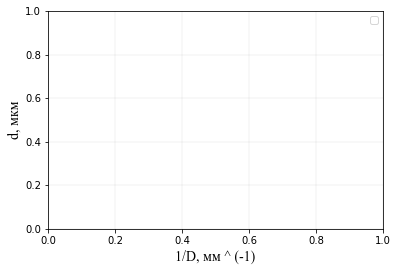

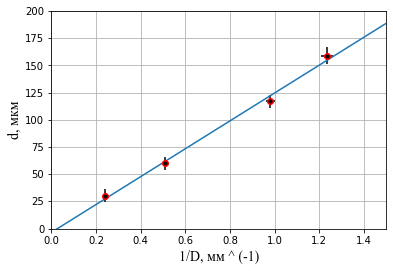

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt;
from math import *;
# plt.title('График', fontsize=20, fontname='Times New Roman');
plt.xlabel('1/D, мм ^ (-1)', fontsize=14, fontname='Times New Roman');
plt.ylabel('d, мкм', fontsize=14, fontname='Times New Roman');
plt.grid(True, color='gray', linestyle='-', linewidth=0.1);
plt.legend(['Калибровка']);


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True, which='both')
ax.set_ylim(0, 200)
ax.set_xlim(0, 1.5)
plt.xlabel('1/D, мм ^ (-1)', fontsize=14, fontname='Times New Roman');
plt.ylabel('d, мкм', fontsize=14, fontname='Times New Roman');
first_plot_1 = [];
for x in range(3):
	first_plot_1.append(128.20051432767738*(x)-3.5767064382637415);
plt.plot(first_plot_1);
plt.plot([0.2415, 0.510, 0.980, 1.235],[30, 60, 117, 159], 'ro');
xer = [0.0024, 0.006, 0.020, 0.025]
yer = [6,6,6,8]
ax = plt.errorbar([0.2415, 0.510, 0.980, 1.235], [30, 60, 117, 159], xerr= xer, yerr=yer, fmt='.k');


plt.show();

plt.savefig('example.png')
plt.savefig('example2.png')